In [1]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd

In [5]:
import numpy as np

In [7]:
import matplotlib.pyplot as plt

In [9]:
import seaborn as sns

In [11]:
from sklearn.preprocessing import StandardScaler

In [13]:
from sklearn.model_selection import GridSearchCV

In [15]:
from sklearn.naive_bayes import GaussianNB

In [17]:
from sklearn.svm import SVC

In [19]:
from sklearn.ensemble import StackingClassifier

In [15]:
from sklearn.metrics import roc_auc_score, confusion_matrix, accuracy_score, classification_report

In [21]:
from sklearn.model_selection import train_test_split

In [23]:
import warnings
warnings.filterwarnings('ignore')

In [25]:
df = pd.read_csv("https://d3ilbtxij3aepc.cloudfront.net/projects/CDS-Capstone-Projects/PRCP-1009-CellphonePrice.zip")

In [27]:
df.head()

battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  m_dep  \
0            842     0          2.2         0   1       0           7    0.6   
1           1021     1          0.5         1   0       1          53    0.7   
2            563     1          0.5         1   2       1          41    0.9   
3            615     1          2.5         0   0       0          10    0.8   
4           1821     1          1.2         0  13       1          44    0.6   

   mobile_wt  n_cores  ...  px_height  px_width   ram  sc_h  sc_w  talk_time  \
0        188        2  ...         20       756  2549     9     7         19   
1        136        3  ...        905      1988  2631    17     3          7   
2        145        5  ...       1263      1716  2603    11     2          9   
3        131        6  ...       1216      1786  2769    16     8         11   
4        141        2  ...       1208      1212  1411     8     2         15   

   three_g  touch_screen  wifi  price_range  
0        0             0     1            1  
1        1             1     0            2  
2        1             1     0            2  
3        1             0     0            2  
4        1             1     0            1  

[5 rows x 21 columns]

In [29]:
df.shape

(2000, 21)

In [31]:
df.size

42000

In [33]:
df.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [37]:
df.describe().T

count        mean          std    min      25%     50%  \
battery_power  2000.0  1238.51850   439.418206  501.0   851.75  1226.0   
blue           2000.0     0.49500     0.500100    0.0     0.00     0.0   
clock_speed    2000.0     1.52225     0.816004    0.5     0.70     1.5   
dual_sim       2000.0     0.50950     0.500035    0.0     0.00     1.0   
fc             2000.0     4.30950     4.341444    0.0     1.00     3.0   
four_g         2000.0     0.52150     0.499662    0.0     0.00     1.0   
int_memory     2000.0    32.04650    18.145715    2.0    16.00    32.0   
m_dep          2000.0     0.50175     0.288416    0.1     0.20     0.5   
mobile_wt      2000.0   140.24900    35.399655   80.0   109.00   141.0   
n_cores        2000.0     4.52050     2.287837    1.0     3.00     4.0   
pc             2000.0     9.91650     6.064315    0.0     5.00    10.0   
px_height      2000.0   645.10800   443.780811    0.0   282.75   564.0   
px_width       2000.0  1251.51550   432.199447  500.0   874.75  1247.0   
ram            2000.0  2124.21300  1084.732044  256.0  1207.50  2146.5   
sc_h           2000.0    12.30650     4.213245    5.0     9.00    12.0   
sc_w           2000.0     5.76700     4.356398    0.0     2.00     5.0   
talk_time      2000.0    11.01100     5.463955    2.0     6.00    11.0   
three_g        2000.0     0.76150     0.426273    0.0     1.00     1.0   
touch_screen   2000.0     0.50300     0.500116    0.0     0.00     1.0   
wifi           2000.0     0.50700     0.500076    0.0     0.00     1.0   
price_range    2000.0     1.50000     1.118314    0.0     0.75     1.5   

                   75%     max  
battery_power  1615.25  1998.0  
blue              1.00     1.0  
clock_speed       2.20     3.0  
dual_sim          1.00     1.0  
fc                7.00    19.0  
four_g            1.00     1.0  
int_memory       48.00    64.0  
m_dep             0.80     1.0  
mobile_wt       170.00   200.0  
n_cores           7.00     8.0  
pc               15.00    20.0  
px_height       947.25  1960.0  
px_width       1633.00  1998.0  
ram            3064.50  3998.0  
sc_h             16.00    19.0  
sc_w              9.00    18.0  
talk_time        16.00    20.0  
three_g           1.00     1.0  
touch_screen      1.00     1.0  
wifi              1.00     1.0  
price_range       2.25     3.0

In [39]:
df["price_range"].value_counts()

price_range
1    500
2    500
3    500
0    500
Name: count, dtype: int64

**EDA**

**BATTERY-PRICE RANGE**

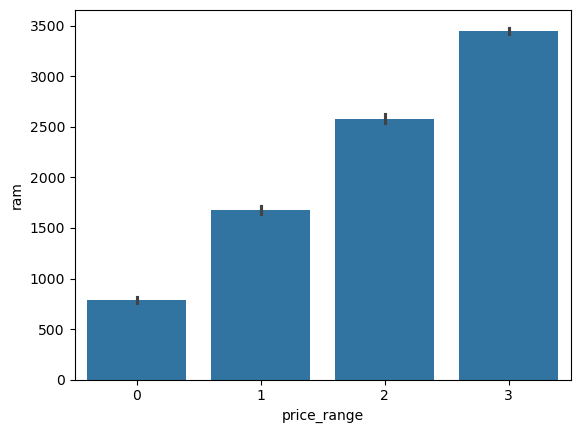

In [43]:
sns.barplot(data=df,y="ram",x="price_range")
plt.show()

**Ram-Price Range**

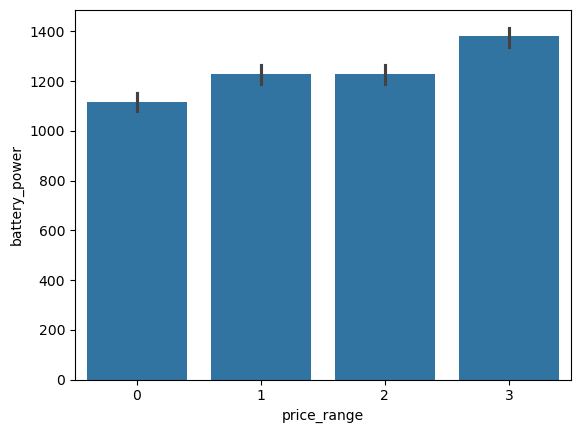

In [46]:
sns.barplot(data=df,y="battery_power",x="price_range")
plt.show()

**Memory-Price Range**

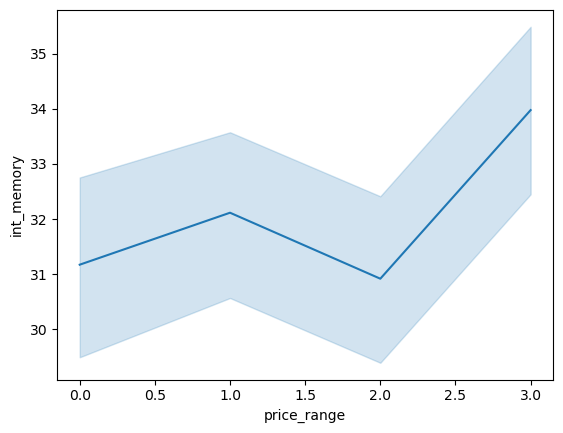

In [49]:
sns.lineplot(data=df,x="price_range",y="int_memory")
plt.show()

**Front mega pixel- Price Range**

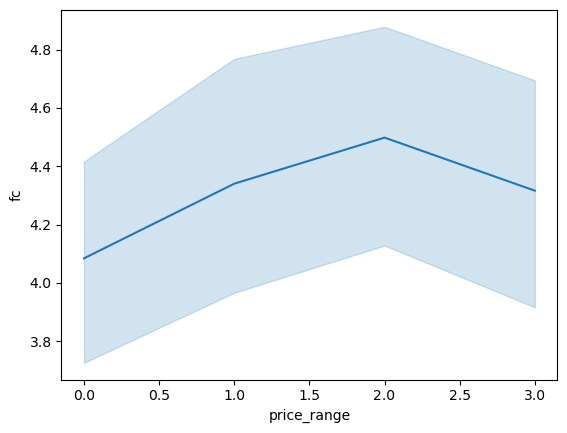

In [52]:
sns.lineplot(data=df,x="price_range",y="fc")
plt.show()

**How many 3g phones and 4g phones**

<Axes: xlabel='three_g', ylabel='count'>

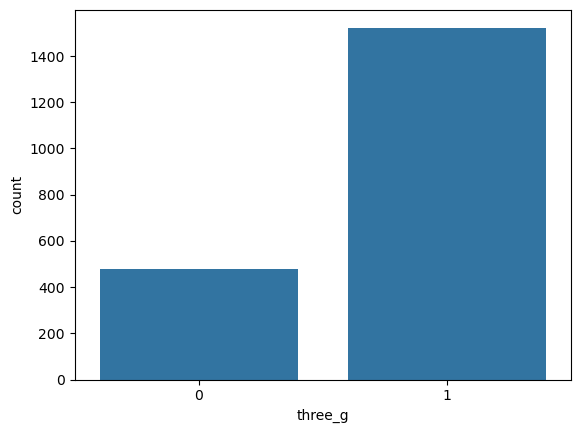

In [55]:
sns.countplot(data=df,x="three_g")

In [57]:
df["three_g"].value_counts()

three_g
1    1523
0     477
Name: count, dtype: int64

<Axes: xlabel='four_g', ylabel='count'>

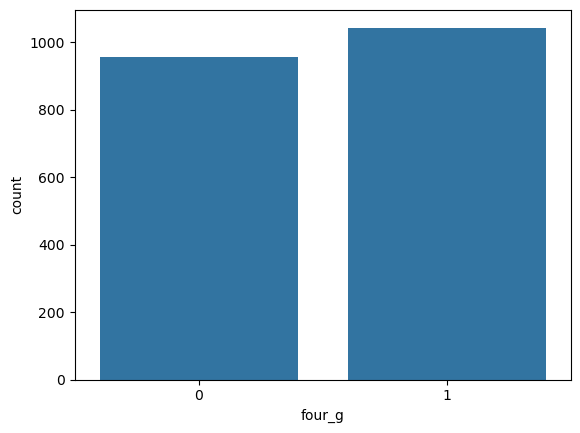

In [59]:
sns.countplot(data=df,x="four_g")

In [61]:
df["four_g"].value_counts()

four_g
1    1043
0     957
Name: count, dtype: int64

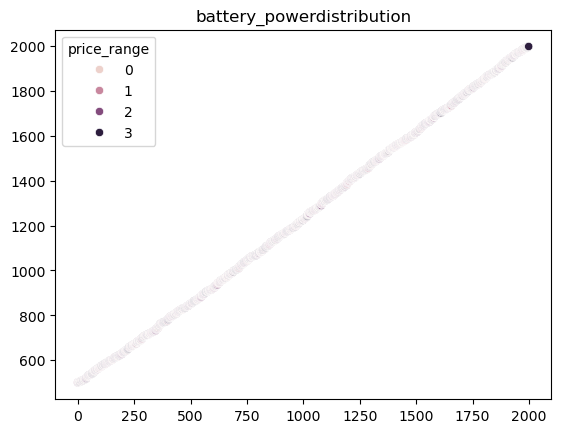

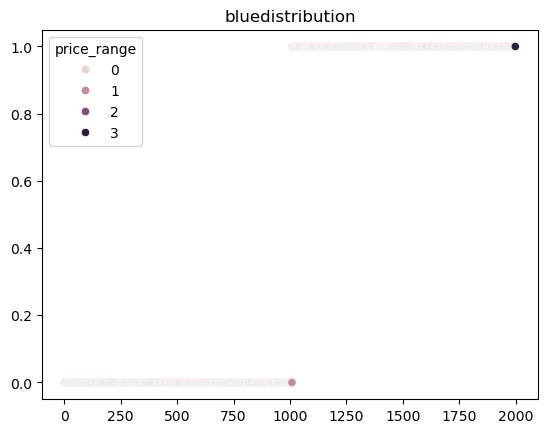

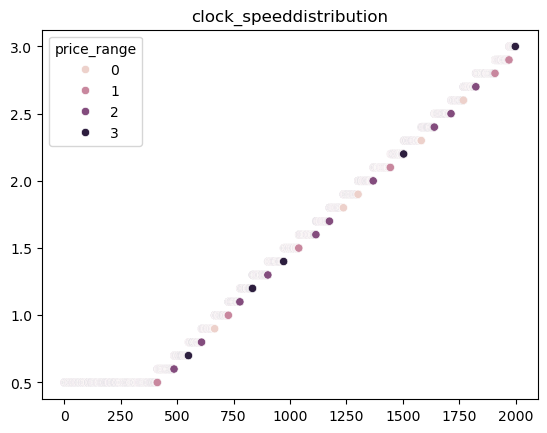

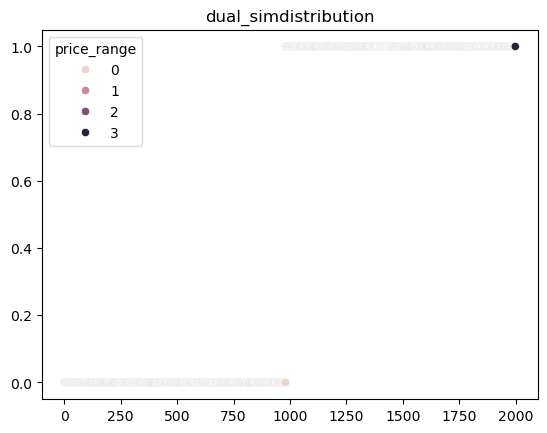

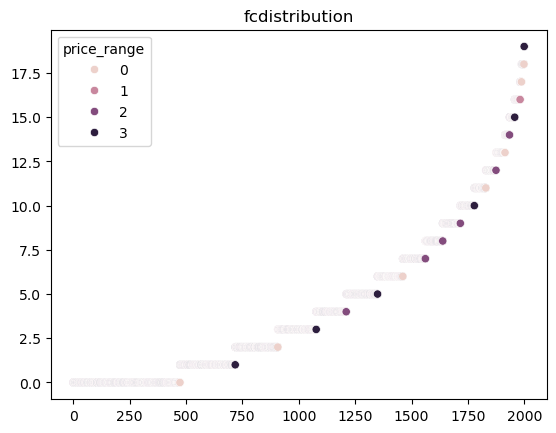

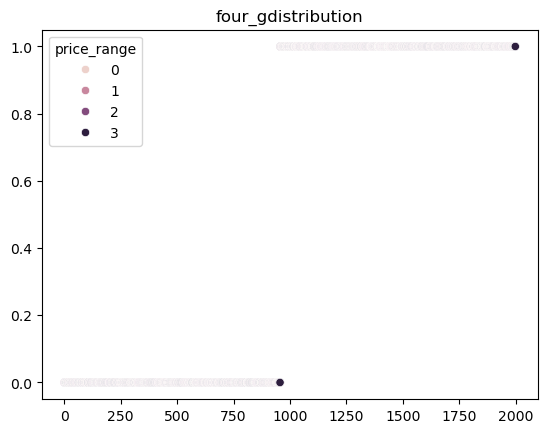

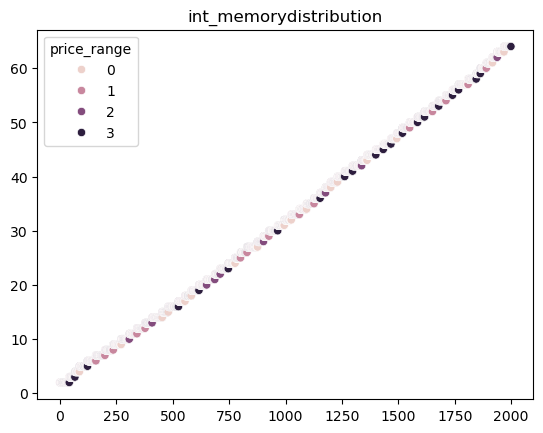

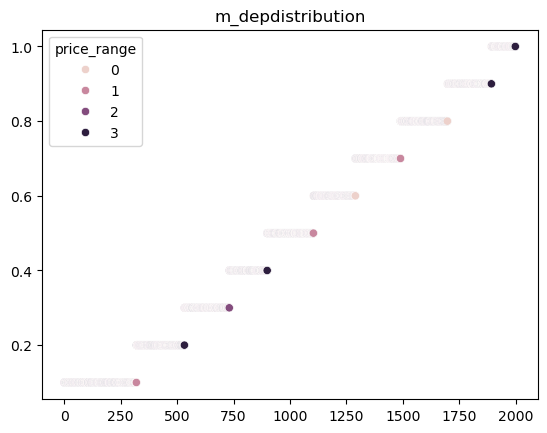

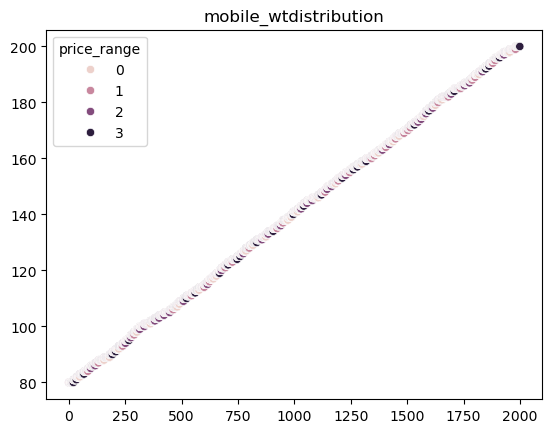

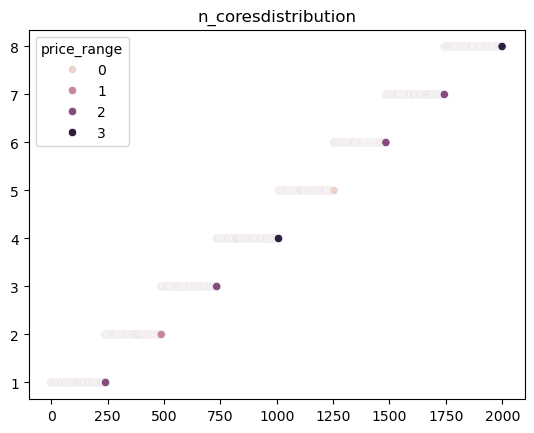

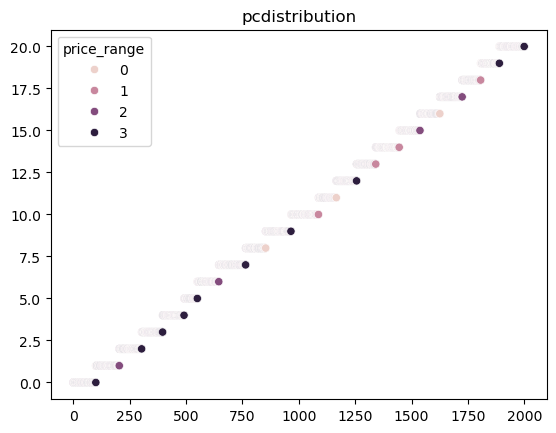

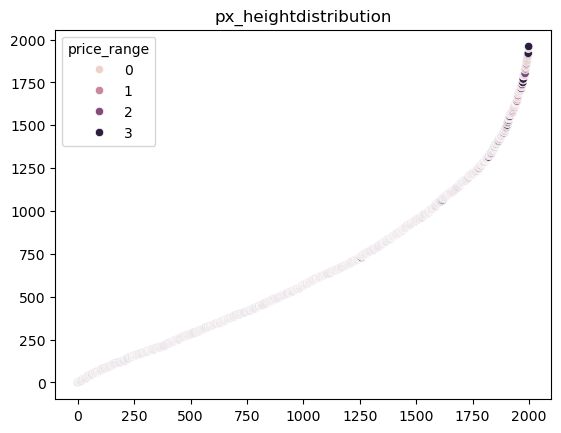

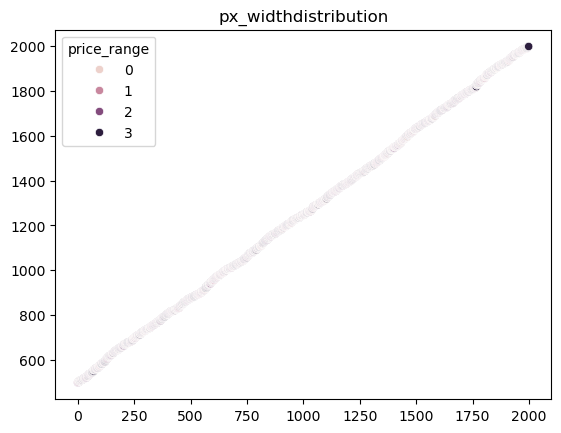

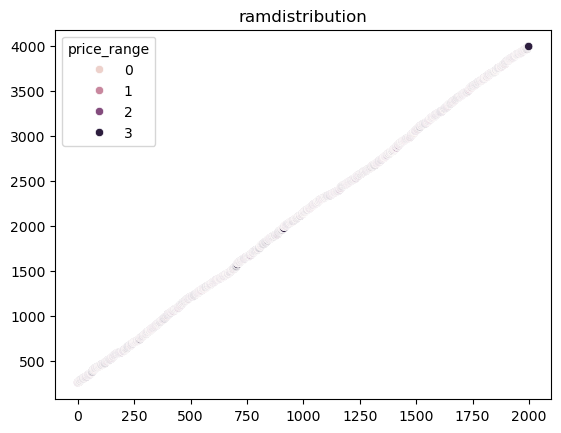

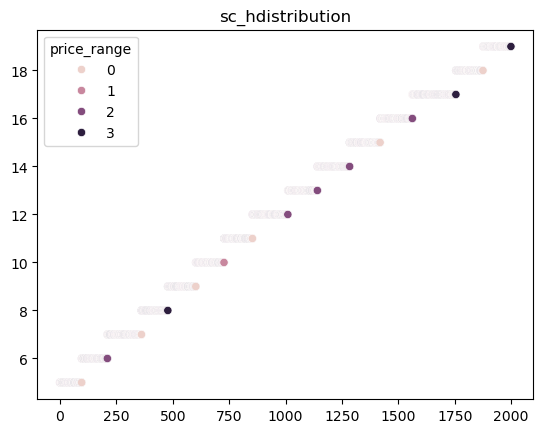

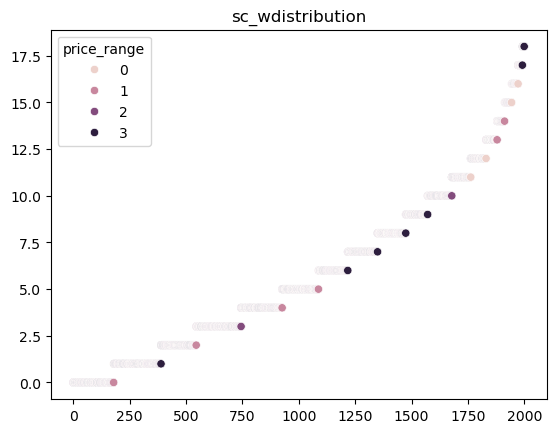

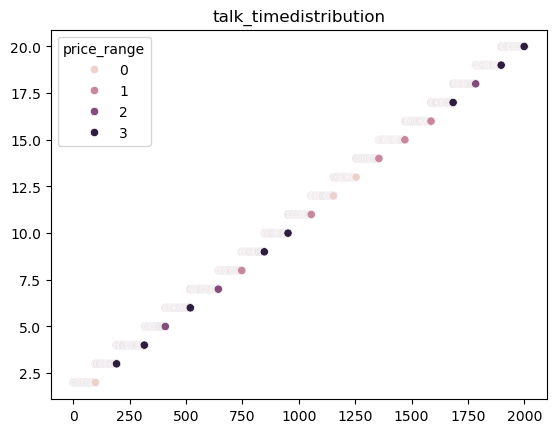

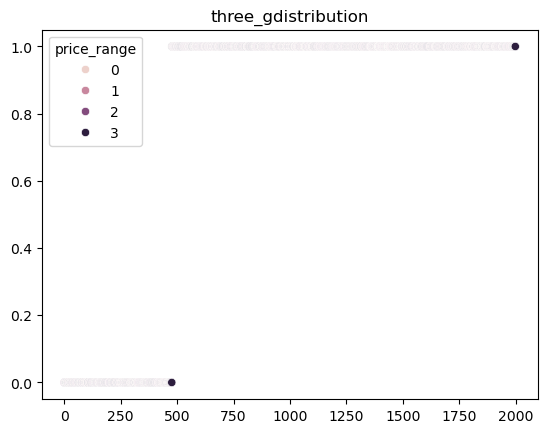

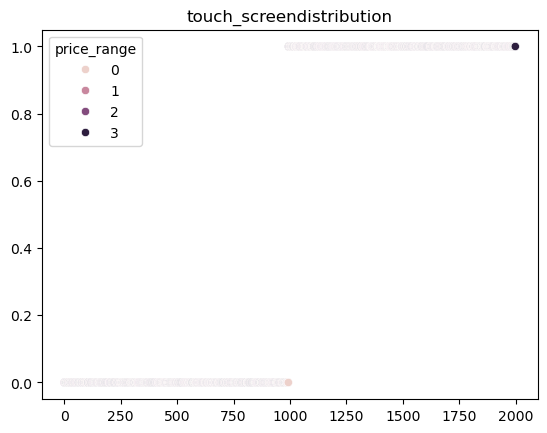

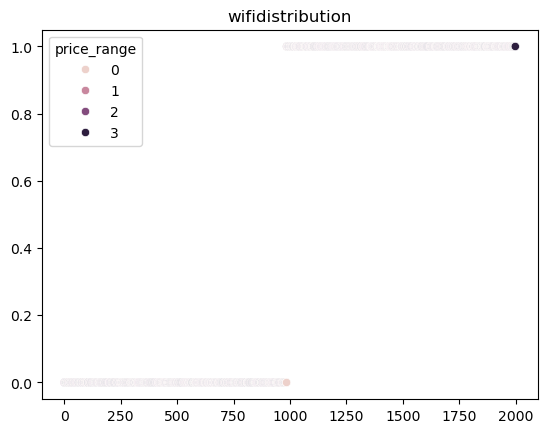

In [63]:
#checking outliers
for i in (df.describe().columns[:-1]):
    sns.scatterplot(df,x=range (len(df[i])),y=np.sort(df[i]),hue="price_range")
    plt.title(i+"distribution")
    plt.show()

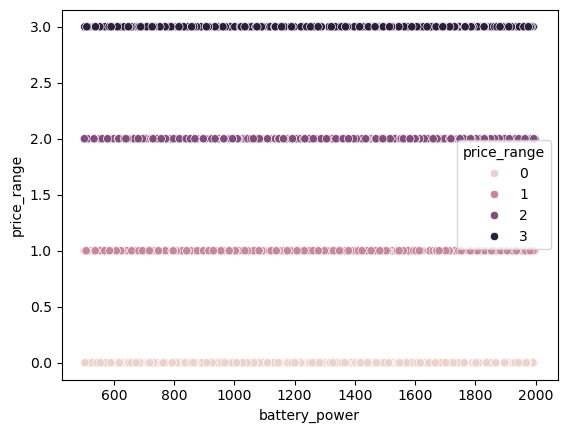

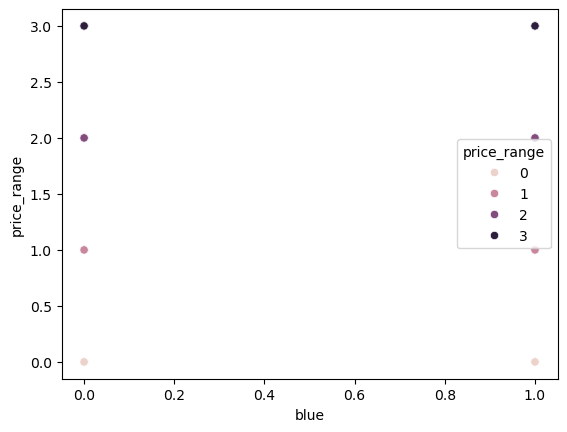

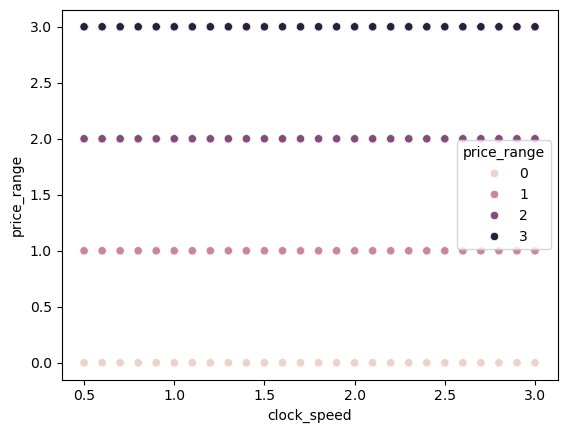

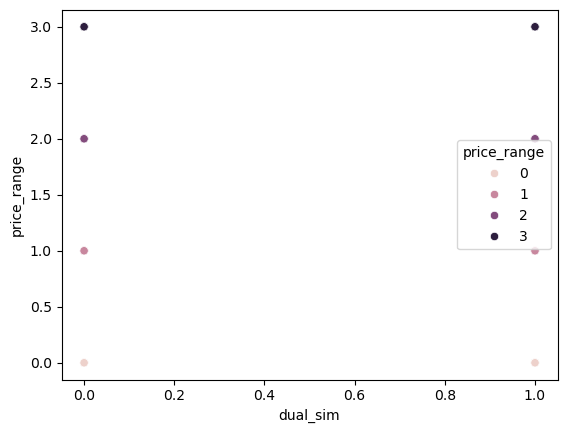

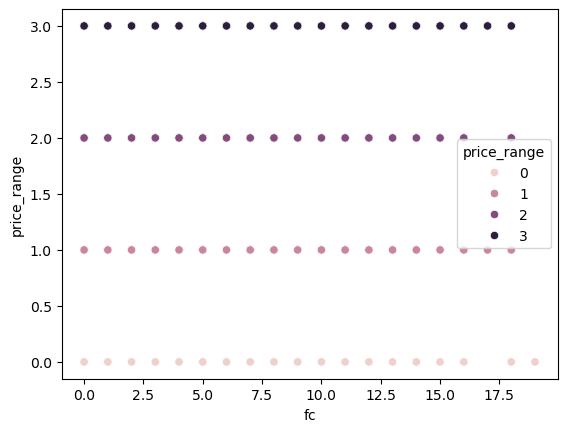

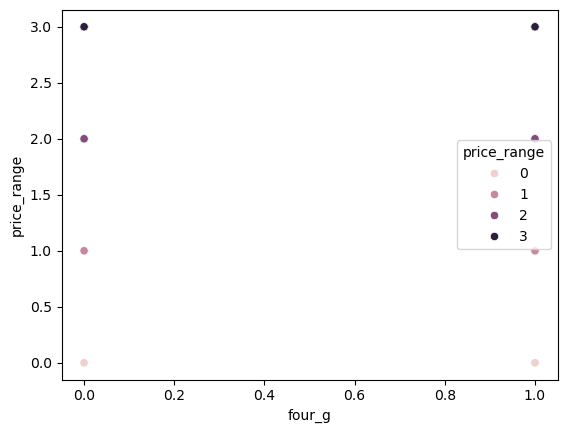

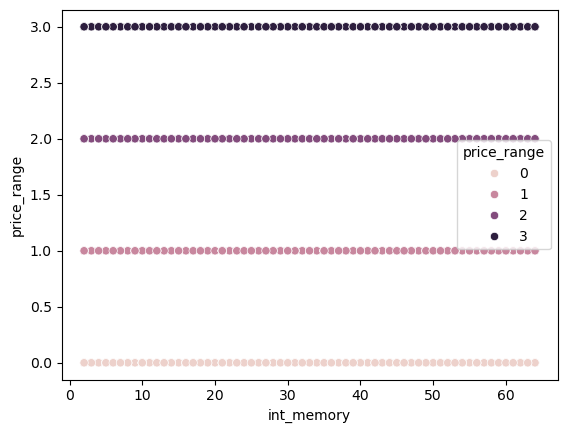

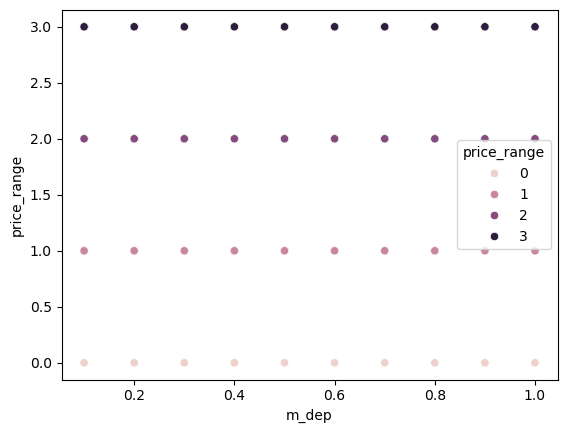

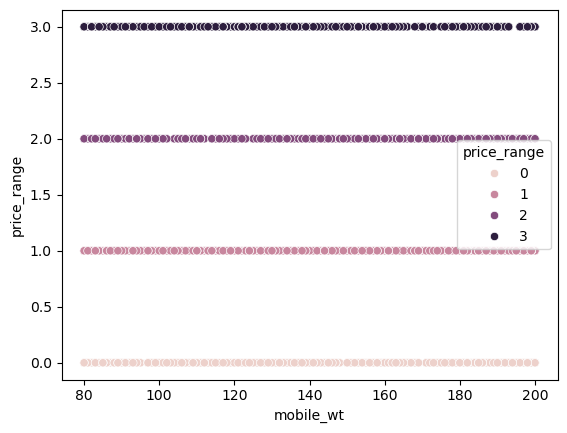

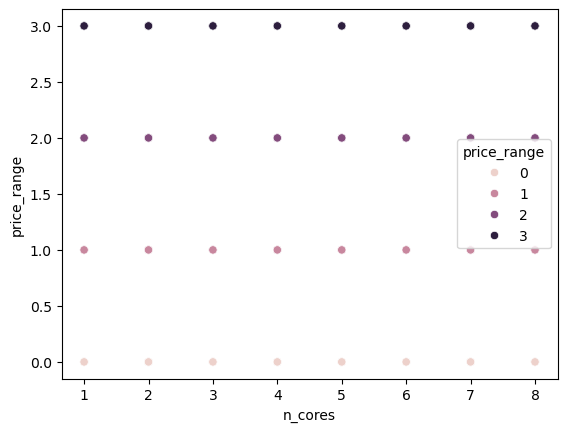

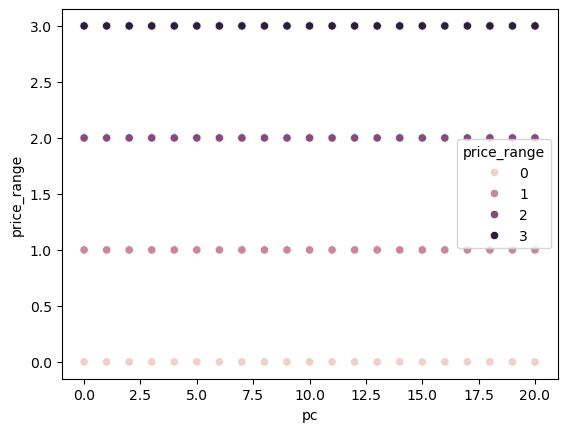

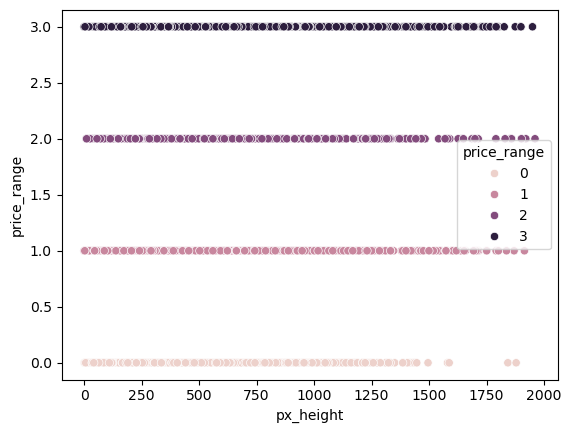

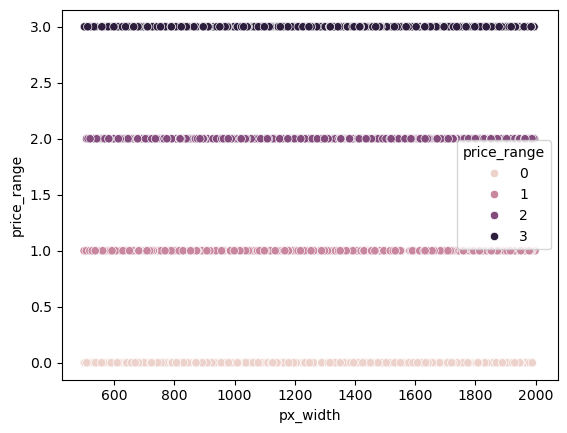

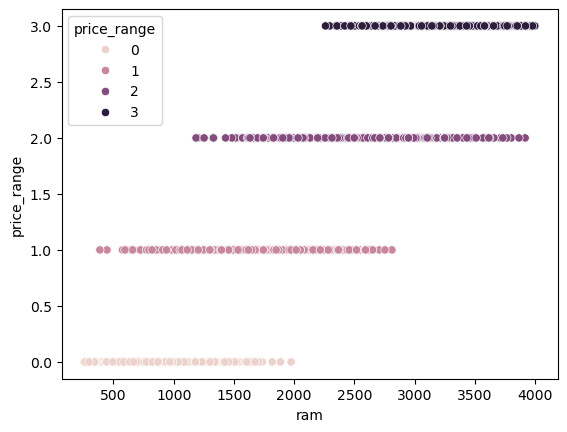

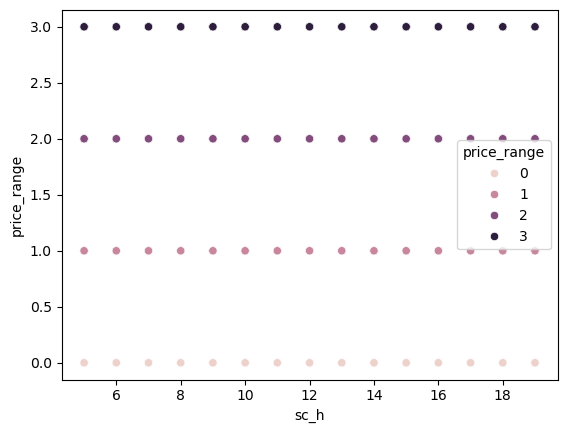

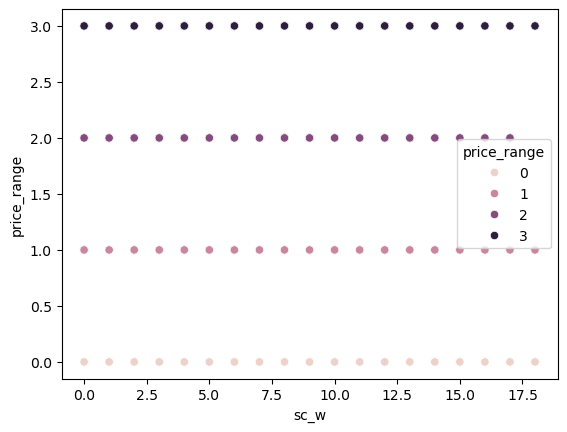

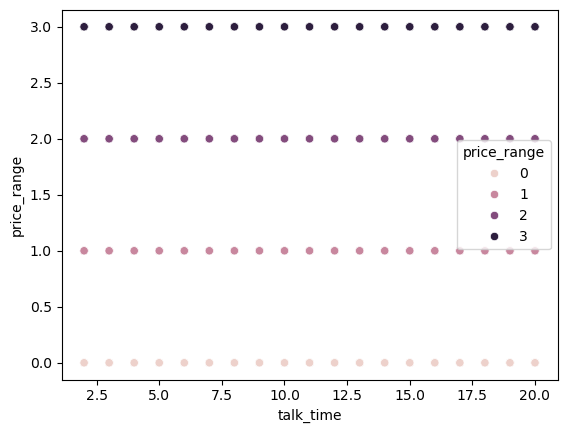

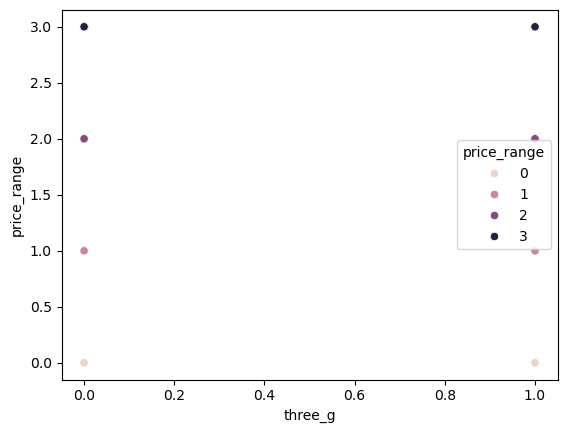

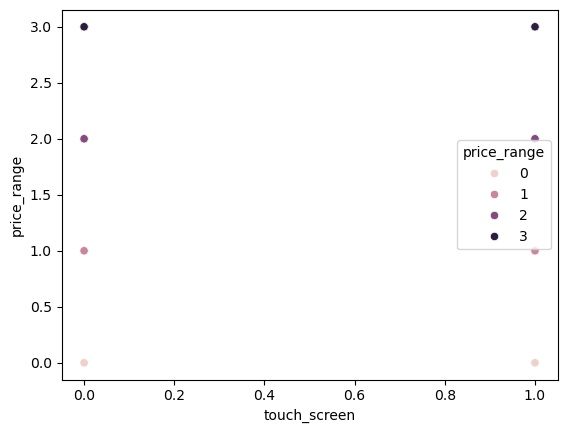

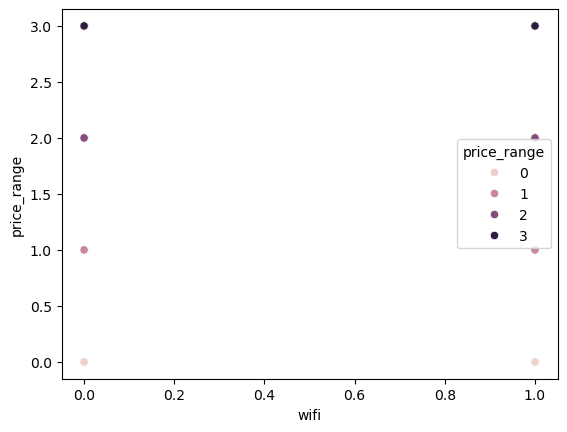

In [65]:
#Checked the relationship between independent and dependent variable.
for i in df.describe().columns[:-1]:
    sns.scatterplot(df,x=i,y=df.describe().columns[-1],hue="price_range")
    plt.show()

# Feature Engineering

**check multicollinearity**

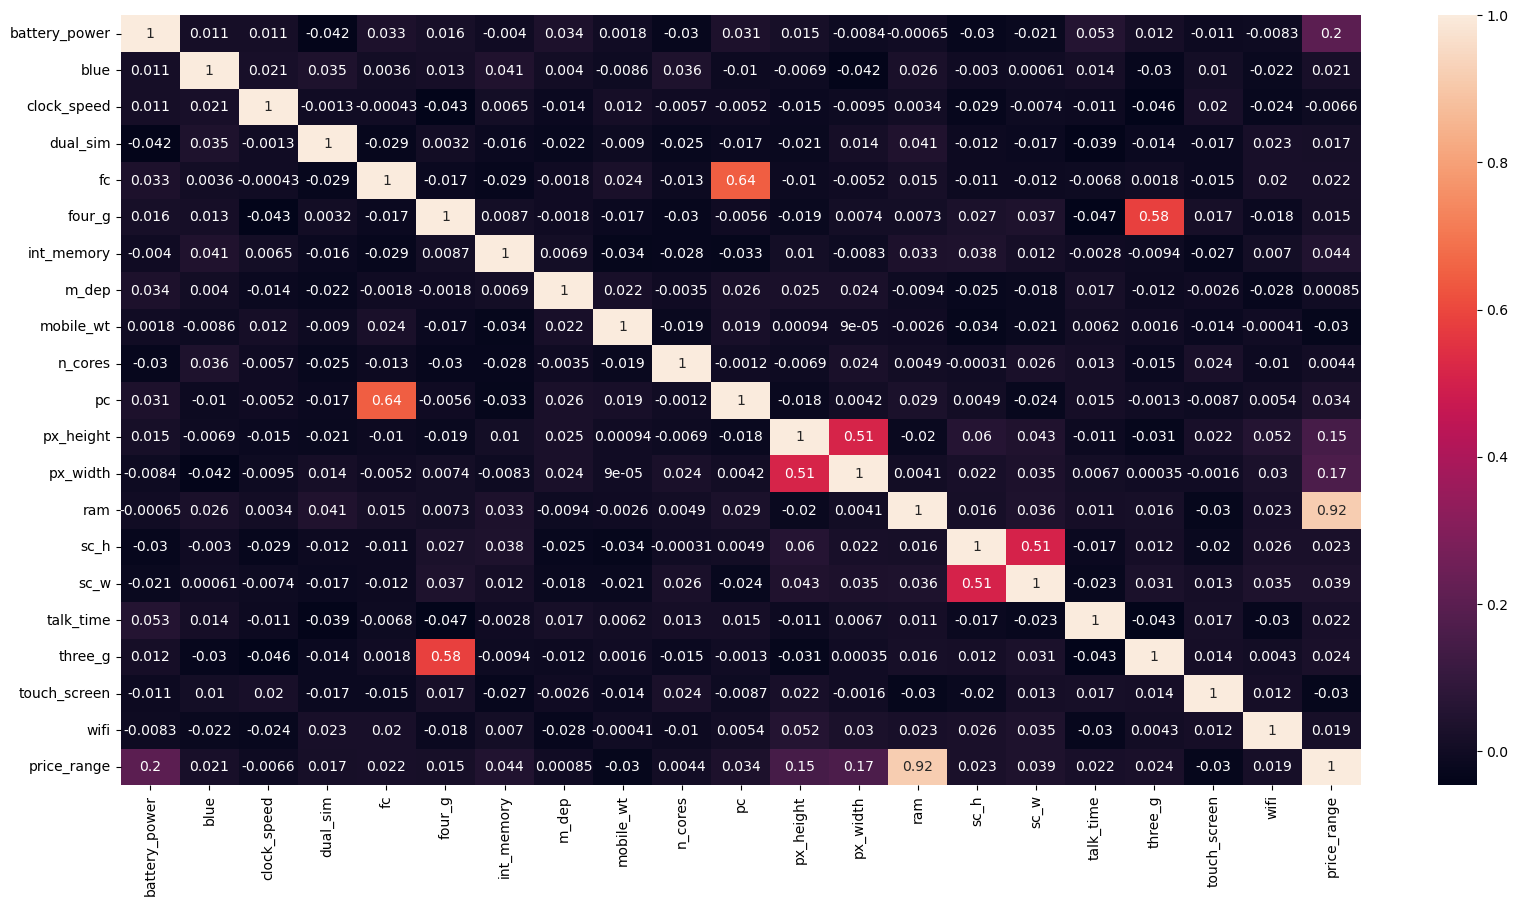

In [69]:
#multicollinearity
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),annot=True)
plt.show()

In [71]:
#Created a feature by combining px_height and px_width, hence we dropped both features.
df["pixels Dimensions"]=df["px_height"]*df["px_width"]

df.drop(columns=["px_height","px_width"],inplace=True)

In [73]:
def change(x):
    return x/1000

In [75]:
#Applied the above function
df["ram"]=df["ram"].apply(change)

In [86]:
# 3G will work on 4G phones, but 4G won't work on 3G phones
df.drop(columns=["three_g"],inplace=True)

# Dataset Loading and Cleanup

In [78]:
df = pd.read_csv("https://d3ilbtxij3aepc.cloudfront.net/projects/CDS-Capstone-Projects/PRCP-1009-CellphonePrice.zip")

In [80]:
df.head()

battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  m_dep  \
0            842     0          2.2         0   1       0           7    0.6   
1           1021     1          0.5         1   0       1          53    0.7   
2            563     1          0.5         1   2       1          41    0.9   
3            615     1          2.5         0   0       0          10    0.8   
4           1821     1          1.2         0  13       1          44    0.6   

   mobile_wt  n_cores  ...  px_height  px_width   ram  sc_h  sc_w  talk_time  \
0        188        2  ...         20       756  2549     9     7         19   
1        136        3  ...        905      1988  2631    17     3          7   
2        145        5  ...       1263      1716  2603    11     2          9   
3        131        6  ...       1216      1786  2769    16     8         11   
4        141        2  ...       1208      1212  1411     8     2         15   

   three_g  touch_screen  wifi  price_range  
0        0             0     1            1  
1        1             1     0            2  
2        1             1     0            2  
3        1             0     0            2  
4        1             1     0            1  

[5 rows x 21 columns]

In [82]:
df.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [86]:
df.describe().T

count        mean          std    min      25%     50%  \
battery_power  2000.0  1238.51850   439.418206  501.0   851.75  1226.0   
blue           2000.0     0.49500     0.500100    0.0     0.00     0.0   
clock_speed    2000.0     1.52225     0.816004    0.5     0.70     1.5   
dual_sim       2000.0     0.50950     0.500035    0.0     0.00     1.0   
fc             2000.0     4.30950     4.341444    0.0     1.00     3.0   
four_g         2000.0     0.52150     0.499662    0.0     0.00     1.0   
int_memory     2000.0    32.04650    18.145715    2.0    16.00    32.0   
m_dep          2000.0     0.50175     0.288416    0.1     0.20     0.5   
mobile_wt      2000.0   140.24900    35.399655   80.0   109.00   141.0   
n_cores        2000.0     4.52050     2.287837    1.0     3.00     4.0   
pc             2000.0     9.91650     6.064315    0.0     5.00    10.0   
px_height      2000.0   645.10800   443.780811    0.0   282.75   564.0   
px_width       2000.0  1251.51550   432.199447  500.0   874.75  1247.0   
ram            2000.0  2124.21300  1084.732044  256.0  1207.50  2146.5   
sc_h           2000.0    12.30650     4.213245    5.0     9.00    12.0   
sc_w           2000.0     5.76700     4.356398    0.0     2.00     5.0   
talk_time      2000.0    11.01100     5.463955    2.0     6.00    11.0   
three_g        2000.0     0.76150     0.426273    0.0     1.00     1.0   
touch_screen   2000.0     0.50300     0.500116    0.0     0.00     1.0   
wifi           2000.0     0.50700     0.500076    0.0     0.00     1.0   
price_range    2000.0     1.50000     1.118314    0.0     0.75     1.5   

                   75%     max  
battery_power  1615.25  1998.0  
blue              1.00     1.0  
clock_speed       2.20     3.0  
dual_sim          1.00     1.0  
fc                7.00    19.0  
four_g            1.00     1.0  
int_memory       48.00    64.0  
m_dep             0.80     1.0  
mobile_wt       170.00   200.0  
n_cores           7.00     8.0  
pc               15.00    20.0  
px_height       947.25  1960.0  
px_width       1633.00  1998.0  
ram            3064.50  3998.0  
sc_h             16.00    19.0  
sc_w              9.00    18.0  
talk_time        16.00    20.0  
three_g           1.00     1.0  
touch_screen      1.00     1.0  
wifi              1.00     1.0  
price_range       2.25     3.0

In [89]:
#Created a feature by combining sc_h and sc_w, hence we dropped both features.
df['Screen Dimension'] = df['sc_h']* df['sc_w']
df.drop(columns=['sc_h','sc_w'],inplace=True)

In [91]:
df.rename(columns={'battery_power':'Battery','blue':'Bluetooth','clock_speed':'Clock_Speed','dual_sim':'Dual_Sim','fc':'Front_Camera','four_g':'4G','int_memory':'Rom','m_dep':'Mobile_Depth','mobile_wt':'Mobile_weight',
                   'n_cores':'Number_of_cores','pc':'Primary_Camera','ram':'Ram','talk_time':'Talk_Time','three_g':'3G','touch_screen':'Touch_Screen','wifi':'Wi-Fi','price_range':'Price_range'},inplace=True)

In [93]:
df = df[['Battery', 'Bluetooth', 'Clock_Speed', 'Dual_Sim', 'Front_Camera', '4G',
       'Rom', 'Mobile_Depth', 'Mobile_weight', 'Number_of_cores',
       'Primary_Camera', 'Ram', 'Talk_Time', '3G', 'Touch_Screen', 'Wi-Fi',
        'Pixels Dimension', 'Screen Dimension','Price_range']]

KeyError: "['Pixels Dimension'] not in index"

# EDA

In [ ]:
plt.title('Distribution of 4G phones')
df['4G'].value_counts().plot(kind='pie',autopct='%.3f',labels=['4G Support','Not Support'],startangle=120)
plt.show()

In [ ]:
plt.title('Distribution of 3G phones')
colors =['#4F6272', '#B7C3F3']
df['3G'].value_counts().plot(kind='pie',autopct='%.2f',labels=['3G Support','Not Support'],startangle=120,colors=colors)
plt.show()

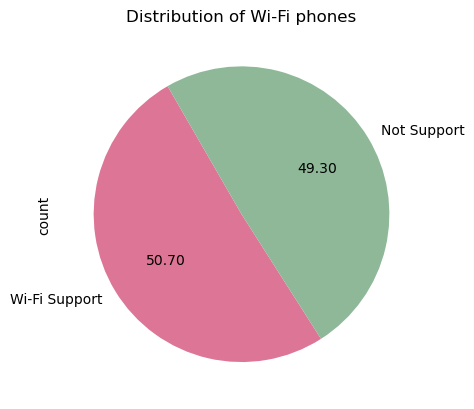

In [97]:
plt.title('Distribution of Wi-Fi phones')
colors = ['#DD7596', '#8EB897']
df['Wi-Fi'].value_counts().plot(kind='pie',autopct='%.2f',labels=['Wi-Fi Support','Not Support'],startangle=120,colors = colors)
plt.show()

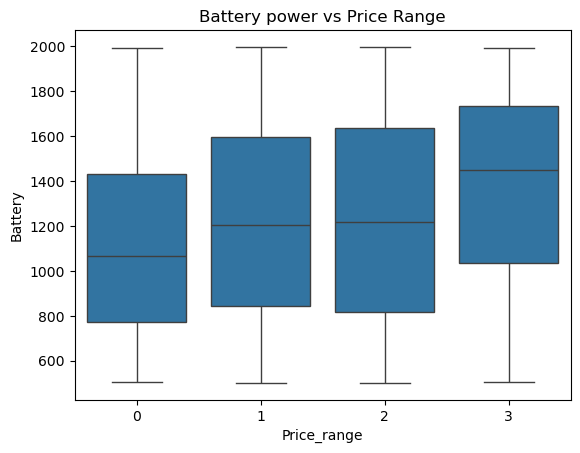

In [99]:
sns.boxplot(x='Price_range',y='Battery',data=df)
plt.title('Battery power vs Price Range')
plt.show()


Text(0.5, 0, 'MegaPixels')

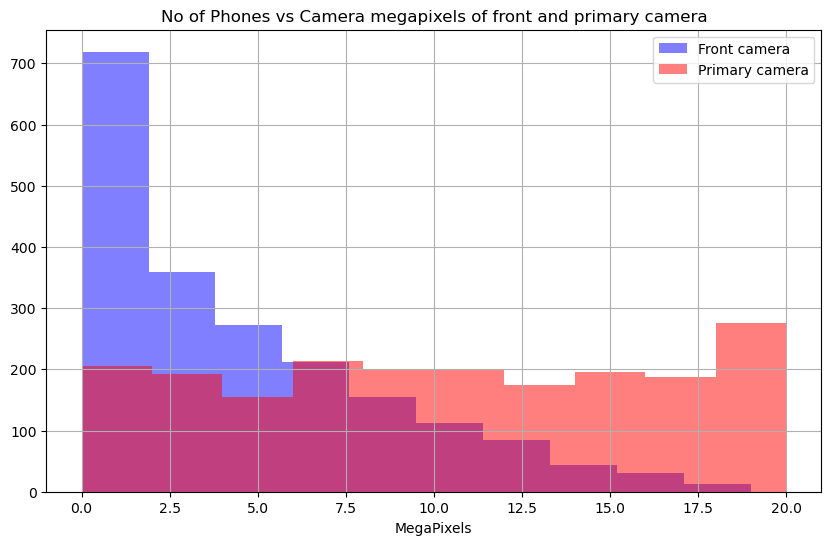

In [101]:
plt.figure(figsize=(10,6))
df['Front_Camera'].hist(alpha=0.5,color='blue',label='Front camera')
df['Primary_Camera'].hist(alpha=0.5,color='red',label='Primary camera')
plt.title("No of Phones vs Camera megapixels of front and primary camera")
plt.legend()
plt.xlabel('MegaPixels')

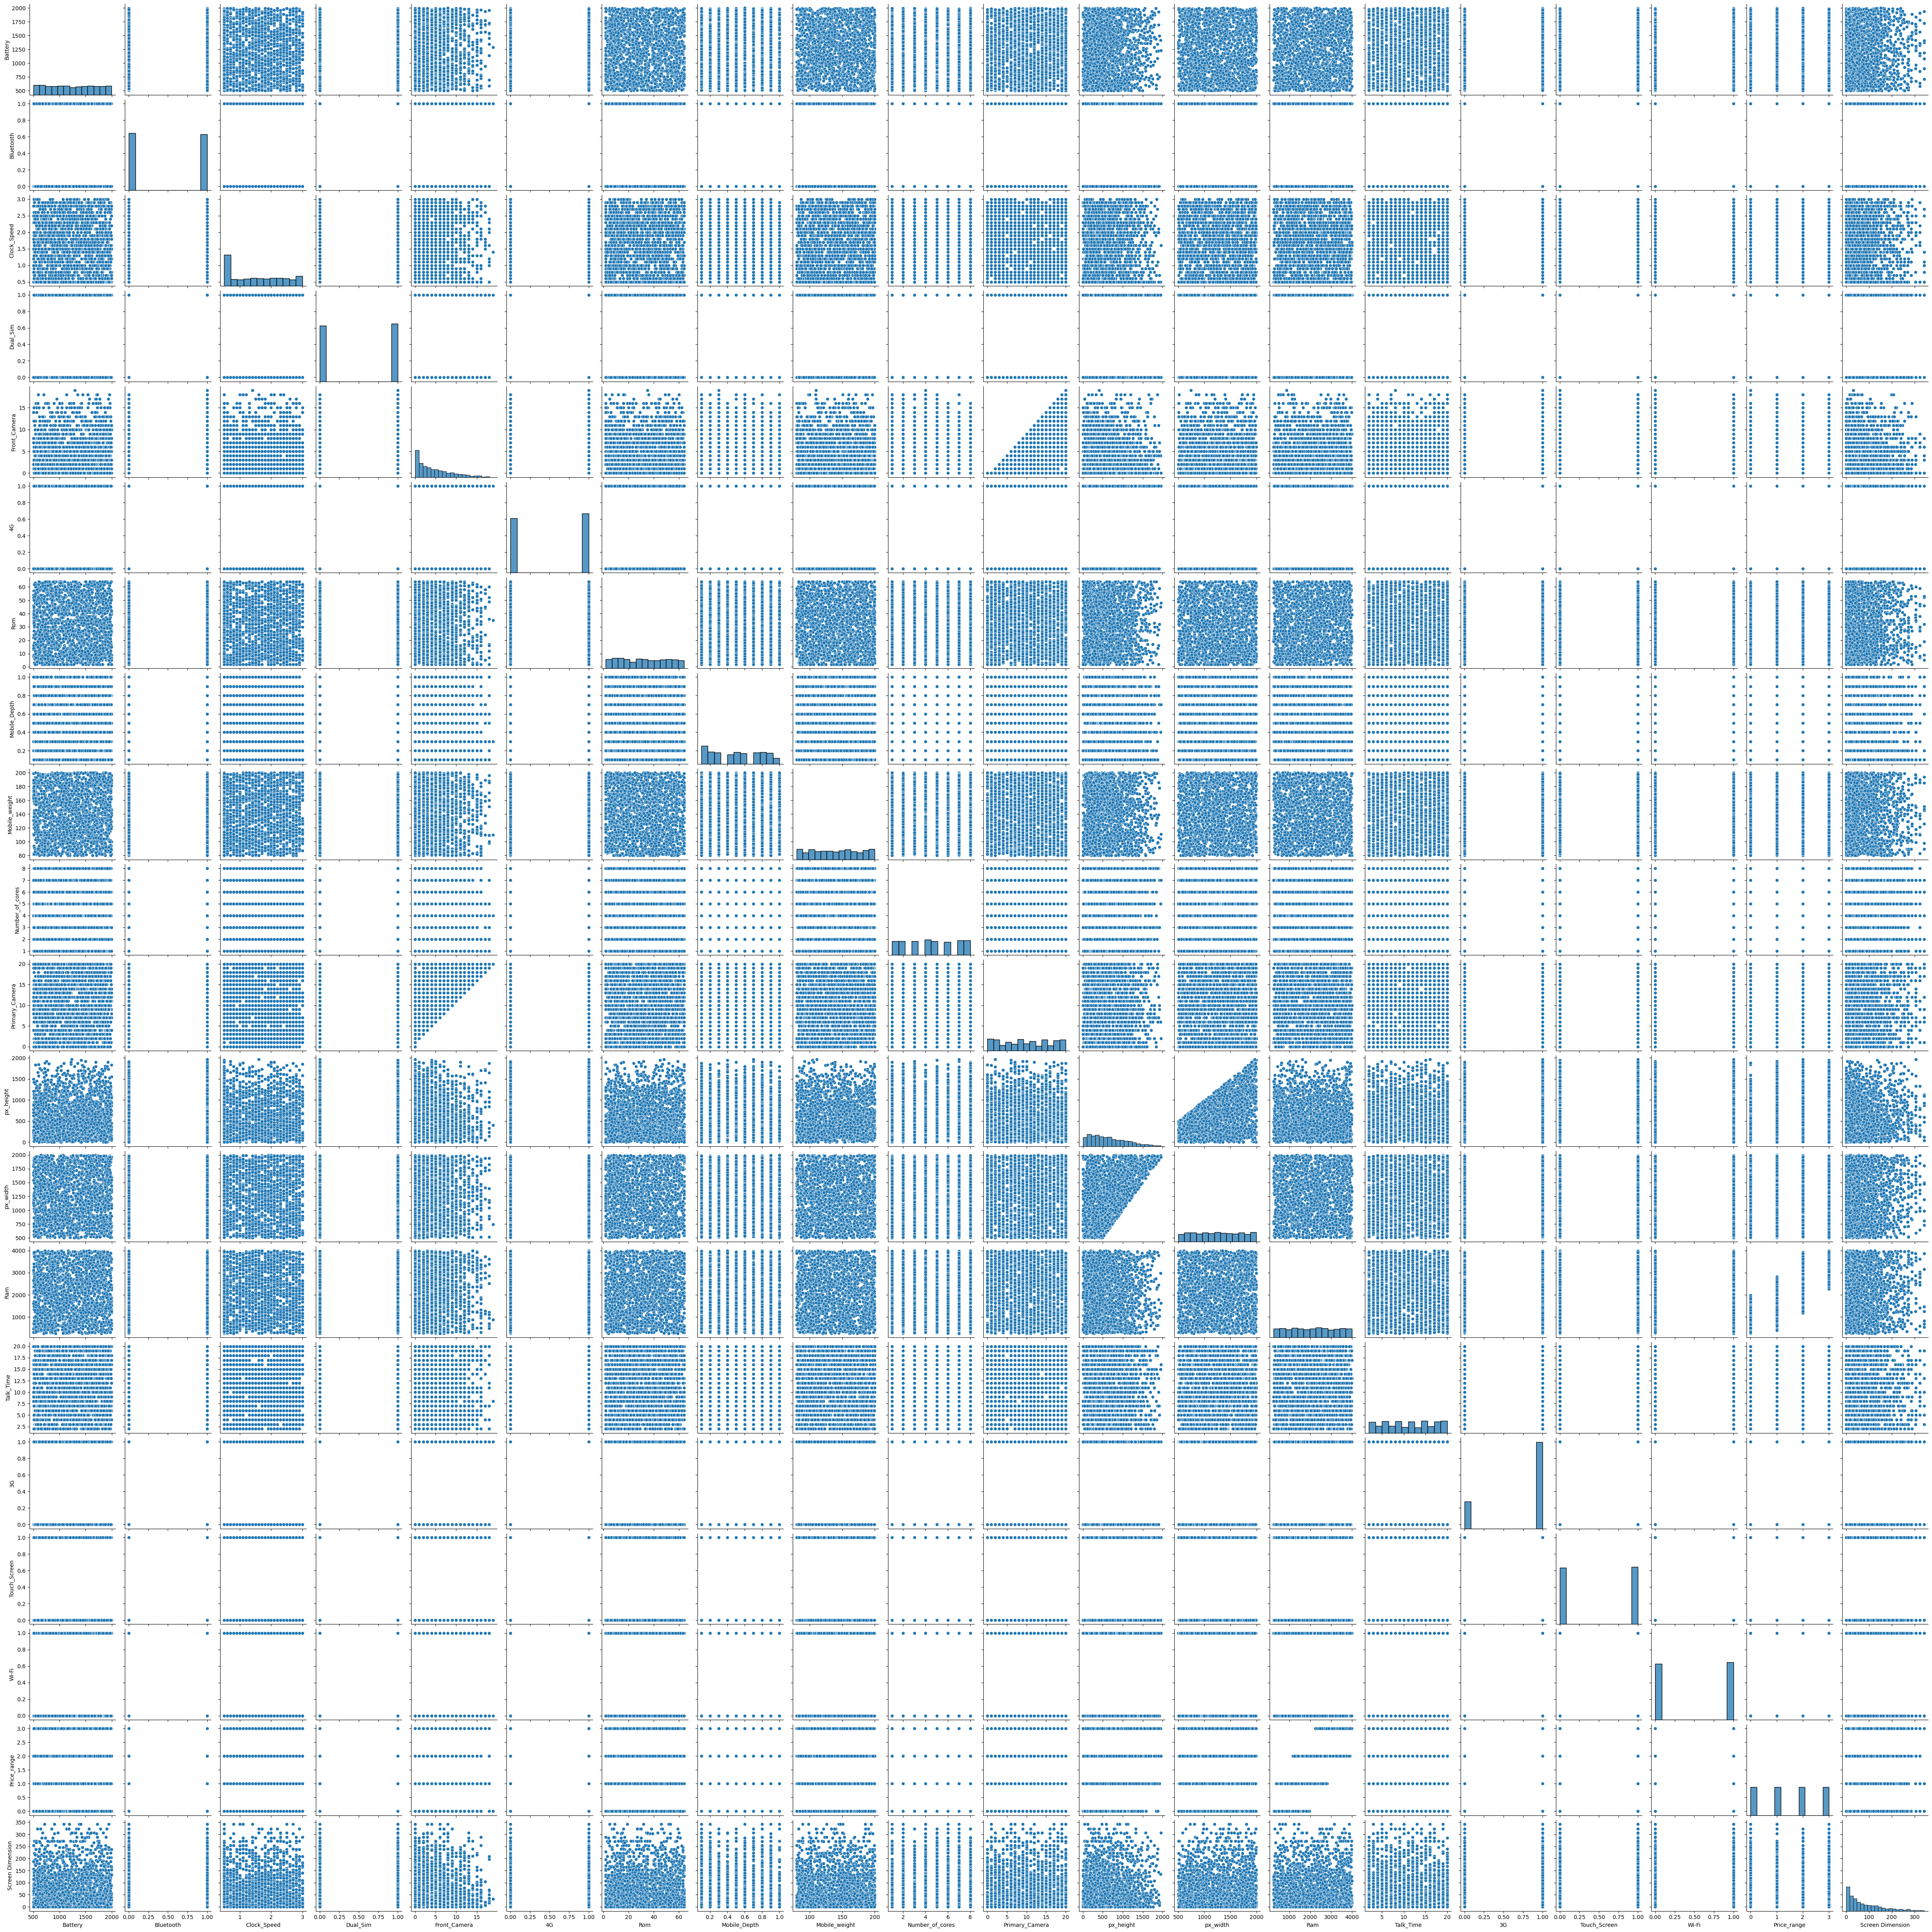

In [103]:
sns.pairplot(df)
plt.show()

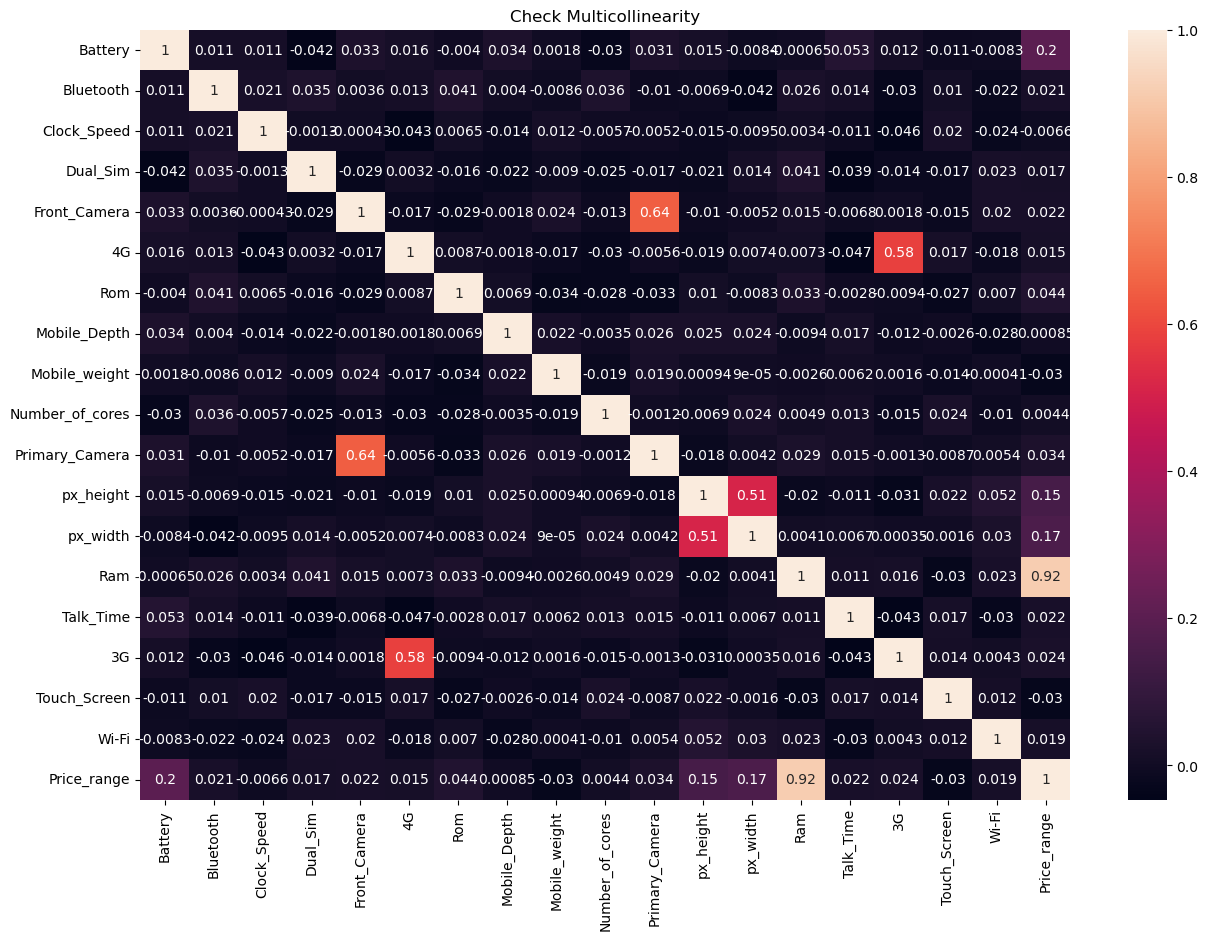

In [214]:
plt.figure(figsize=(15,10))
plt.title('Check Multicollinearity')
sns.heatmap(df.iloc[:,0:-1].corr(),annot=True)
plt.show()

# Data Preprocessing

In [105]:
#Defined price_range as dependent variable and rest all the features as independent variable
dependent_variable ='Price_range'
independent_varaible = list(set(df.columns.tolist())-{dependent_variable})

In [107]:
# stored the independent and dependent values in x and y variable respectively
x=df[independent_varaible].values
y=df[dependent_variable].values

In [109]:
# split the data into 4 parts x_train,x_test,y_train,y_test
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=0,stratify=y)

**Feature scalling**

In [112]:
#Created an object for StandardScaler
stand = StandardScaler()

In [114]:
#Scalling
x_train = stand.fit_transform(x_train)
x_test = stand.transform(x_test)

# Model Implementation